In [1]:
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np
import torch

torch.manual_seed(123)

In [2]:
class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']

In [3]:
from torchvision import datasets, transforms
data_path = '../data/ch7'
cifar10 = datasets.CIFAR10(data_path, train=True, download=False,
                          transform=transforms.Compose([
                              transforms.ToTensor(),
                              transforms.Normalize((0.4915, 0.4823, 0.4468),
                                                   (0.2470, 0.2435, 0.2616))
                          ]))

In [4]:
cifar10_val = datasets.CIFAR10(data_path, train=False, download=False,
                          transform=transforms.Compose([
                              transforms.ToTensor(),
                              transforms.Normalize((0.4915, 0.4823, 0.4468),
                                                   (0.2470, 0.2435, 0.2616))
                          ]))

In [5]:
label_map = {0: 0, 2: 1}
class_names = ['airplane', 'bird']
cifar2 = [(img, label_map[label]) for img, label in cifar10 if label in [0, 2]]
cifar2_val = [(img, label_map[label]) for img, label in cifar10_val if label in [0, 2]]

In [32]:
import torch.nn as nn

n_out = 2

model = nn.Sequential(
            nn.Linear(
                3072,
                512,
            ),
            nn.Tanh(),
            nn.Linear(
                512,
                n_out,
            )
        )

In [7]:
def softmax(x):
    return torch.exp(x) / torch.exp(x).sum()

$
softmax(x_1, x_2) = (\frac{e^{x_1}}{e^{x_1} + e^{x_2}},\frac{e^{x_2}}{e^{x_1} + e^{x_2}}) \\
softmax(x_1, \dots, x_n) = (\frac{e^{x_1}}{e^{x_1} + \dots + e^{x_n}}, \dots, \frac{e^{x_n}}{e^{x_1} + \dots + e^{x_n}})
$

In [8]:
x = torch.tensor([1., 2., 3.])
softmax(x)

tensor([0.0900, 0.2447, 0.6652])

In [9]:
softmax(x).sum()

tensor(1.)

$
\sum softmax(x)=\sum\limits_{i=0}^{N}\frac{e^i}{\sum_{j=0}^{N} e^j}=1
$

In [10]:
softmax = nn.Softmax(dim=1)

x = torch.tensor([[1., 2., 3.],
                  [1., 2., 3.]])
softmax(x)

tensor([[0.0900, 0.2447, 0.6652],
        [0.0900, 0.2447, 0.6652]])

In [11]:
model = nn.Sequential(
            nn.Linear(3072, 512),
            nn.Tanh(),
            nn.Linear(512, 2),
            nn.Softmax(dim=1))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


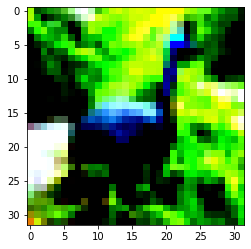

In [12]:
img, _ = cifar2[0]

plt.imshow(img.permute(1, 2, 0))
plt.show()

In [13]:
img_batch = img.view(-1).unsqueeze(0)

In [14]:
out = model(img_batch)
out

tensor([[0.4784, 0.5216]], grad_fn=<SoftmaxBackward>)

In [15]:
_, index = torch.max(out, dim=1)
index

tensor([1])

In [16]:
model = nn.Sequential(
            nn.Linear(3072, 512),
            nn.Tanh(),
            nn.Linear(512, 2),
            nn.LogSoftmax(dim=1),
        )

In [17]:
loss = nn.NLLLoss()

In [18]:
img, label = cifar2[0]

out = model(img.view(-1).unsqueeze(0))

loss(out, torch.tensor([label]))

tensor(0.5077, grad_fn=<NllLossBackward>)

In [24]:
'''
import torch.optim as optim
import time

tic = time.time()

model = nn.Sequential(
            nn.Linear(3072, 512),
            nn.Tanh(),
            nn.Linear(512, 2),
            nn.LogSoftmax(dim=1))

learning_rate = 1e-2

optimizer = optim.SGD(model.parameters(), lr=learning_rate)

loss_fn = nn.NLLLoss()

n_epochs = 100

for epoch in range(n_epochs):
    for img, label in cifar2:
        out = model(img.view(-1).unsqueeze(0))
        loss = loss_fn(out, torch.tensor([label]))
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    
    print('Epoch: {}, Loss: {}'.format(epoch, float(loss)))
    
toc = time.time()
print('Spend time ' + str(toc - tic) + 's')
'''
''

''

In [27]:
import torch
import torch.nn as nn
import torch.optim as optim
import time
tic = time.time()

train_loader = torch.utils.data.DataLoader(cifar2, batch_size=64, shuffle=True)

model = nn.Sequential(
            nn.Linear(3072, 512),
            nn.Tanh(),
            nn.Linear(512, 2),
            nn.LogSoftmax(dim=1))

learning_rate = 1e-2

optimizer = optim.SGD(model.parameters(), lr=learning_rate)

loss_fn = nn.NLLLoss()

n_epochs = 100

for epoch in range(n_epochs):
    for imgs, labels in train_loader:
        batch_size = imgs.shape[0]
        outputs = model(imgs.view(batch_size, -1))
        loss = loss_fn(outputs, labels)
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
    print('Epoch: {}, Loss: {}'.format(epoch+1, float(loss)))
    
toc = time.time()
delta_time = toc - tic
print('Spend time ' + str(int(delta_time / 3600)) + 'h' + 
      str(int(delta_time / 60 % 60)) + 'm' + str(int(delta_time % 60)) + 's')

Epoch: 1, Loss: 0.5669606924057007
Epoch: 2, Loss: 0.3292829394340515
Epoch: 3, Loss: 0.49530547857284546
Epoch: 4, Loss: 0.35676783323287964
Epoch: 5, Loss: 0.19398456811904907
Epoch: 6, Loss: 0.46490418910980225
Epoch: 7, Loss: 0.45544928312301636
Epoch: 8, Loss: 0.46037939190864563
Epoch: 9, Loss: 0.24305753409862518
Epoch: 10, Loss: 0.43668925762176514
Epoch: 11, Loss: 0.349956214427948
Epoch: 12, Loss: 0.4603939354419708
Epoch: 13, Loss: 0.39098405838012695
Epoch: 14, Loss: 0.4621390104293823
Epoch: 15, Loss: 0.22492431104183197
Epoch: 16, Loss: 0.5685446858406067
Epoch: 17, Loss: 0.5020055770874023
Epoch: 18, Loss: 0.2851449251174927
Epoch: 19, Loss: 0.4238271117210388
Epoch: 20, Loss: 0.4577503204345703
Epoch: 21, Loss: 0.41526052355766296
Epoch: 22, Loss: 0.29702848196029663
Epoch: 23, Loss: 0.22636890411376953
Epoch: 24, Loss: 0.04349592700600624
Epoch: 25, Loss: 0.3086414635181427
Epoch: 26, Loss: 0.33681151270866394
Epoch: 27, Loss: 0.26489609479904175
Epoch: 28, Loss: 0.080

In [28]:
val_loader = torch.utils.data.DataLoader(cifar2_val, batch_size=64, shuffle=False)

correct = 0
total = 0

with torch.no_grad():
    for imgs, labels in val_loader:
        batch_size = imgs.shape[0]
        outputs = model(imgs.view(batch_size, -1))
        _, predicted = torch.max(outputs, dim=1)
        total += labels.shape[0]
        correct += int((predicted == labels).sum())
    
print('Accuracy: {}'.format(correct / total))

Accuracy: 0.815


In [33]:
model = nn.Sequential(
            nn.Linear(3072, 1024),
            nn.Tanh(),
            nn.Linear(1024, 512),
            nn.Tanh(),
            nn.Linear(512, 128),
            nn.Tanh(),
            nn.Linear(128, 2))

loss_fn = nn.CrossEntropyLoss()  # combination of nn.LogSoftmax and nn.NLLLoss

In [31]:
numel_list = [p.numel() for p in model.parameters() if p.requires_grad == True]
sum(numel_list), numel_list

(3737474, [3145728, 1024, 524288, 512, 65536, 128, 256, 2])

$
p.numel() = (N_{weight}\times N_{bias}, N_{bias})
$

In [34]:
model = nn.Sequential(
            nn.Linear(
                3072,
                512,
            ),
            nn.Tanh(),
            nn.Linear(
                512,
                n_out,
            )
        )

numel_list = [p.numel() for p in model.parameters() if p.requires_grad == True]
sum(numel_list), numel_list

(1574402, [1572864, 512, 1024, 2])

In [35]:
linear = nn.Linear(3072, 1024)

linear.weight.shape, linear.bias.shape

(torch.Size([1024, 3072]), torch.Size([1024]))